In [2]:
from f_drosophila_infer import *
from f_train import *
from f_data_prep import *

In [3]:
with open('./pickles/LAD_(99,99)_ttv.pkl', 'rb') as f:
    LAD = pickle.load(f)

In [6]:
gene_names = np.genfromtxt('../gene_names.txt', dtype='str')
gene_names = np.hstack(([g.split('_')[0] for g in gene_names[3:][::6]]))
print(np.argwhere(gene_names == 'Kr'), np.argwhere(gene_names == 'KrP'))

array(['Alh', 'Ama', 'Ance', 'Antp', 'Blimp', 'Bsg25A', 'Btk29A',
       'CG10479', 'CG10924', 'CG11208', 'CG13333', 'CG14427', 'CG17724',
       'CG17786', 'CG31607', 'CG31670', 'CG4702', 'CG8147', 'CG8965',
       'Cyp310a1', 'D', 'Dfd', 'Doc2', 'Doc3', 'Esp', 'HLHm5', 'Ilp4',
       'ImpE2', 'ImpL2', 'Kr', 'MESR3', 'Mdr49', 'Mes2', 'Nek2', 'NetA',
       'Traf1', 'aay', 'apt', 'bcd', 'bmm', 'brk', 'bun', 'cad', 'cenG1A',
       'chrb', 'cnc', 'comm2', 'croc', 'dan', 'danr', 'disco', 'dpn',
       'edl', 'emc', 'eve', 'fj', 'fkh', 'ftz', 'gk', 'gt', 'h', 'hb',
       'hkb', 'htl', 'jumu', 'ken', 'kni', 'knrl', 'lok', 'mfas', 'noc',
       'nub', 'numb', 'oc', 'odd', 'path', 'peb', 'prd', 'pxb', 'rho',
       'rib', 'sala', 'slp1', 'slp2', 'sna', 'sob', 'srp', 'term', 'tkv',
       'tll', 'toc', 'trn', 'tsh', 'twi', 'zen', 'KrP', 'bcdP', 'gtP',
       'hbP'], dtype='<U8')

In [7]:
w = LAD['w']
bias = LAD['bias']
print(w.shape)
print(w.max(), np.unravel_index(np.argmax(w, axis=None), w.shape),\
      w.min(), np.unravel_index(np.argmin(w, axis=None), w.shape))

(4950, 99)
2.3224862303753517 (1944, 15) -2.7921809978306706 (3670, 17)


In [8]:
data_all = np.loadtxt('../data_complete.txt')
median = np.median(data_all, axis=0)
# data_all = data_all - median
all_bin = np.vsplit(data_all, 6)
all_init = np.vstack([all_bin[i] for i in range(5)])[:,comp_ind]
all_diff = np.vstack([all_bin[i+1]-all_bin[i] for i in range(5)])[:, comp_ind]

complete_all = ([int(x) - 1 for x in open('../indices_complete.txt','r').readline().split()])
comp_ind = list(map(int, list((np.array(complete_all)[::6]-3)/6)))

# quad_init = np.copy(all_init)
# # for i in range(len(comp_ind)-1):
# #     for j in range(i+1, len(comp_ind)):
# #         quad_init = np.hstack((quad_init, (all_init[:,comp_ind[i]]*all_init[:,comp_ind[j]])[:,None]))

# for i in range(26):
#     for j in range(i+1, 27):
#         quad_init = np.hstack((quad_init, (all_init[:,i]*all_init[:,j])[:,None]))
# print('initial gene with quad var: ', quad_init.shape)

# y_actual = np.vstack([all_bin[i+1] for i in range(5)])[:, comp_ind]
# print('Target gene at t_+1: ', y_actual.shape)

# y_pred = all_init + (bias + quad_init.dot(w))
# print('Predicted gene at t_+1: ', y_pred.shape)

# y_pred_nobias = all_init + quad_init.dot(w)

# from matplotlib import gridspec

# # error_nobias = (np.sum(np.abs(y_actual - y_pred_nobias)**2, axis=1)/np.sum(np.abs(y_actual)**2, axis=1))**(1/2)
# # error_bin = np.vsplit(error_nobias[:,None], 5)
# # error_cell = np.sum(error_bin, axis=0)/6
# # error_gene_all_nobias = (np.sum(np.abs(y_actual - y_pred_nobias)**2, axis=0)/np.sum(np.abs(y_actual)**2, axis=0))**(1/2)

# # fig = plt.figure(figsize=(16,6))
# # gs = gridspec.GridSpec(1,2, width_ratios=[1,2])
# # ax0 = plt.subplot(gs[0])
# # ax0.hist(error_cell, bins=100)
# # ax0.set_xlabel('error_cell')
# # ax0.set_ylabel('count')

# # ax1 = plt.subplot(gs[1])
# # ax1.plot(range(99), error_gene_all_nobias, 'o--')
# # ax1.plot(comp_ind, error_gene_all_nobias[comp_ind], 'ro')
# # ax1.set_xlabel('gene')
# # ax1.set_ylabel('fractional error')
# # plt.show()

# error = (np.sum(np.abs(y_actual - y_pred)**2, axis=1)/np.sum(np.abs(y_actual)**2, axis=1))**(1/2)
# error_bin = np.vsplit(error[:,None], 5)
# error_cell = np.sum(error_bin, axis=0)/6
# error_gene_all = (np.sum(np.abs(y_actual - y_pred)**2, axis=0)/np.sum(np.abs(y_actual)**2, axis=0))**(1/2)
# print('mean error: ', np.mean(error_cell))

# fig = plt.figure(figsize=(16,6))
# gs = gridspec.GridSpec(1,2, width_ratios=[1,2])
# ax0 = plt.subplot(gs[0])
# ax0.hist(error_cell, bins=100)
# ax0.set_xlabel('error_cell')
# ax0.set_ylabel('count')

# ax1 = plt.subplot(gs[1])
# ax1.plot(comp_ind, error_gene_all, 'o--')
# # ax1.plot(comp_ind, error_gene_all[comp_ind], 'ro')
# # ax1.plot(range(99), error_gene_all_nobias, 'o--')
# # ax1.plot(comp_ind, error_gene_all_nobias[comp_ind], 'ro')
# ax1.set_xlabel('gene')
# ax1.set_ylabel('fractional error')
# plt.show()

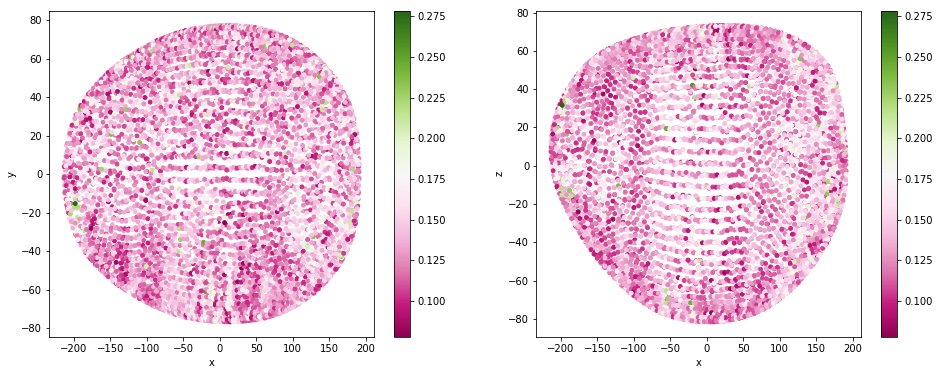

In [8]:
raw_data = np.loadtxt('../dmel_data.txt').T
xyz = raw_data[:,:3]
xlabels = ['x', 'y', 'z']

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121)
xy = ax.scatter(xyz[:,0], xyz[:,1], c=error_cell.flatten(), s=15, cmap=plt.cm.PiYG)
plt.colorbar(xy)
ax.set_xlabel(xlabels[0])
ax.set_ylabel(xlabels[1])
ax = fig.add_subplot(122)
xz = ax.scatter(xyz[:,0], xyz[:,2], c=error_cell.flatten(), s=15, cmap=plt.cm.PiYG)
plt.colorbar(xz)
ax.set_xlabel(xlabels[0])
ax.set_ylabel(xlabels[2])
plt.show()

In [9]:
init = np.copy(all_bin[0])[:,comp_ind]

for iter in range(5):
    init_quad = np.copy(init)
    for i in range(len(comp_ind)-1):
        for j in range(i+1, len(comp_ind)):
            init_quad = np.hstack((init_quad, (init[:,i]*init[:,j])[:,None]))
    diff = init_quad.dot(w) + bias
    init += diff
y_pred = init
y_actual = all_bin[5][:,comp_ind]

print('Target gene at t_5: ', y_actual.shape)
print('Predicted gene at t_5: ', y_pred.shape)

Target gene at t_5:  (6078, 27)
Predicted gene at t_5:  (6078, 27)


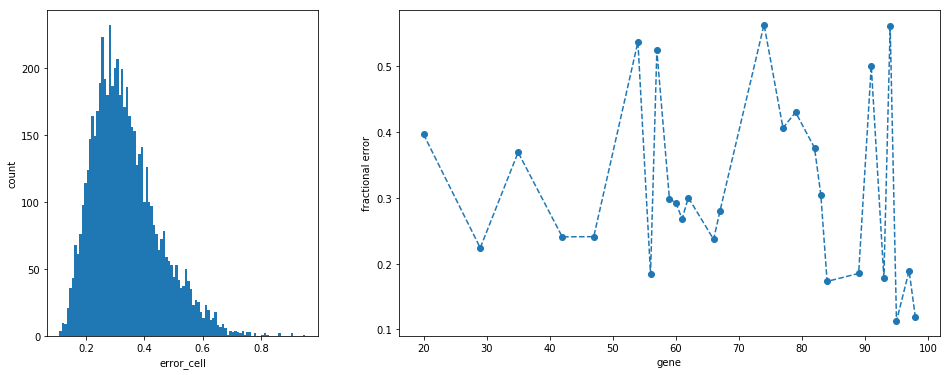

In [10]:
error_cell = (np.sum(np.abs(y_actual - y_pred)**2, axis=1)/np.sum(np.abs(y_actual)**2, axis=1))**(1/2)
error_gene = (np.sum(np.abs(y_actual - y_pred)**2, axis=0)/np.sum(np.abs(y_actual)**2, axis=0))**(1/2)

fig = plt.figure(figsize=(16,6))
gs = gridspec.GridSpec(1,2, width_ratios=[1,2])
ax0 = plt.subplot(gs[0])
ax0.hist(error_cell, bins=100)
ax0.set_xlabel('error_cell')
ax0.set_ylabel('count')

ax1 = plt.subplot(gs[1])
ax1.plot(comp_ind, error_gene, 'o--')
# ax1.plot(comp_ind, error_gene[comp_ind], 'r*')
# ax1.plot(range(99), error_gene_all, 'ko--')
# ax1.plot(comp_ind, error_gene_all[comp_ind], 'r*')
ax1.set_xlabel('gene')
ax1.set_ylabel('fractional error')
plt.show()

In [9]:
def simulation(X, n_split=2, n_bin=2):
    X_split = np.vsplit(X, n_split)
    stacks = np.copy(X_split[0])
    for i in range(n_split-1):
        diff = X_split[i+1] - X_split[i]
        diff_inc = diff/n_bin
        for j in range(1, n_bin):
            stacks = np.dstack((stacks, X_split[i]+j*(diff_inc)))
        stacks = np.dstack((stacks, X_split[i+1]))
    return stacks

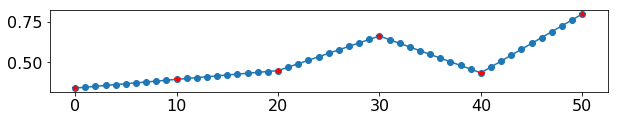

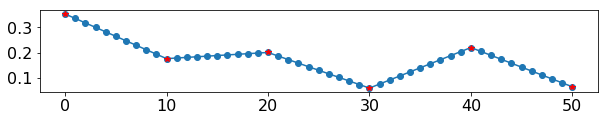

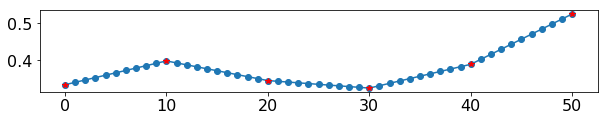

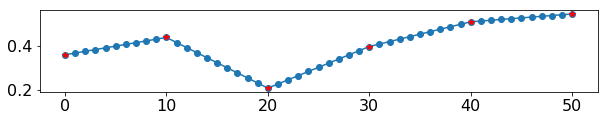

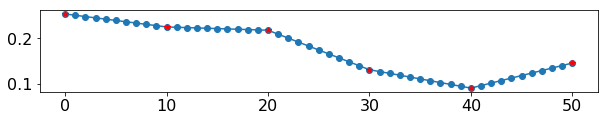

In [18]:
n_bin = 10
stacks = simulation(data_all, n_split=6, n_bin=n_bin)

n = 5
cell = np.random.randint(6077, size=n)
gene = np.random.randint(26, size=n)
for c,g in zip(cell,gene):
    plt.figure(figsize=(10,1.5))
    plt.plot(range(5*n_bin+1), stacks[c,g,:],'o-')
    plt.plot(range(0,5*n_bin+1,n_bin), stacks[c,g,::n_bin],'r*')
    plt.show()

In [19]:
stacks.shape

(6078, 99, 51)

In [20]:
def sim_diff(X, w, bias):
    diff = np.empty([6078,99,0])
    r, c, d = X.shape
    for i in range(d):
        init = np.copy(X[:,:,i])
        quad = np.copy(X[:,:,i])
#         print(init.shape)
        for j in range(98):
            for k in range(j+1, 99):
                quad = np.hstack((quad, (init[:,j]*init[:,k])[:,None]))
#         print(init.shape)
        diff = np.dstack((diff, init + quad.dot(w) + bias))
    print(diff.shape)
    return diff

In [21]:
diff = sim_diff(stacks, w, bias)

(6078, 99, 51)


In [16]:
# %matplotlib notebook
# %matplotlib notebook
# from matplotlib.animation import FuncAnimation

# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,6))
# ax1.set(xlim=(np.min(xyz[:,0])-25, np.max(xyz[:,0]+25)), ylim=(np.min(xyz[:,2]-25), np.max(xyz[:,2]+25)))
# scat1 = ax1.scatter(xyz[:,0], xyz[:,2], c=stacks[:,1,0], cmap='viridis_r')
# plt.colorbar(scat1, ax=ax1)

# ax2.set(xlim=(np.min(xyz[:,0])-25, np.max(xyz[:,0]+25)), ylim=(np.min(xyz[:,2]-25), np.max(xyz[:,2]+25)))
# scat2 = ax2.scatter(xyz[:,0], xyz[:,2], c=diff[:,-3,0], cmap='rainbow')
# plt.colorbar(scat2, ax=ax2)

# def animate(i):
#     color1 = stacks[:,1,i]
#     scat1.set_array(color1)
#     color2 = diff[:,-3,i]
#     scat2.set_array(color2)
#     ax1.set_title('Frame ' + str(i) + ' gene bcdP')
#     ax2.set_title('Frame ' + str(i) + ' gene bcdP diff')

# mywriter = matplotlib.animation.FFMpegWriter()
# anim = FuncAnimation(fig, animate, interval=400, frames=51)
# plt.draw()
# plt.show()

# anim.save("test.png", writer=mywriter)
# plt.savefig('test.pdf')

In [24]:
%matplotlib inline
%matplotlib inline

matplotlib.rcParams.update({'font.size': 22})

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.subplots_adjust(wspace=0.15)
ax1.set(xlim=(np.min(xyz[:,0])-25, np.max(xyz[:,0]+25)), ylim=(np.min(xyz[:,2]-25), np.max(xyz[:,2]+25)))
scat1 = ax1.scatter(xyz[:,0], xyz[:,2], c=stacks[:,1,0], cmap='viridis_r')
plt.colorbar(scat1, ax=ax1)
ax1.set_title('Frame 0, Kr (mRNA)')
ax1.set_xlabel('x')
ax1.set_ylabel('z')

ax2.set(xlim=(np.min(xyz[:,0])-25, np.max(xyz[:,0]+25)), ylim=(np.min(xyz[:,2]-25), np.max(xyz[:,2]+25)))
scat2 = ax2.scatter(xyz[:,0], xyz[:,2], c=diff[:,-3,0], cmap='rainbow')
plt.colorbar(scat2, ax=ax2)
ax2.set_title('Frame 0, Kr (protein) diff')
ax2.set_xlabel('x')
# ax2.set_ylabel('z')

plt.savefig('./movie_frames/frame_0')
plt.close()

for i in range(1,51):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
    plt.subplots_adjust(wspace=0.15)
    ax1.set(xlim=(np.min(xyz[:,0])-25, np.max(xyz[:,0]+25)), ylim=(np.min(xyz[:,2]-25), np.max(xyz[:,2]+25)))
    ax1.scatter(xyz[:,0], xyz[:,2], c=stacks[:,1,i], cmap='viridis_r')
    plt.colorbar(scat1, ax=ax1)
    ax1.set_title('Frame %s, Kr (mRNA)' %i)
    ax1.set_xlabel('x')
    ax1.set_ylabel('z')

    ax2.set(xlim=(np.min(xyz[:,0])-25, np.max(xyz[:,0]+25)), ylim=(np.min(xyz[:,2]-25), np.max(xyz[:,2]+25)))
    ax2.scatter(xyz[:,0], xyz[:,2], c=diff[:,-3,i], cmap='rainbow')
    plt.colorbar(scat2, ax=ax2)
    ax2.set_title('Frame %s, Kr (protein) diff' %i)
    ax2.set_xlabel('x')
#     ax2.set_ylabel('z')
    
    plt.savefig('./movie_frames/frame_'+str(i))
    plt.close()